In [1]:
import scipy as scp
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Lattice:
    def __init__(self, *vecs):
        # if the vecs were put in an iterable
        if len(vecs) == 1:
            vecs = vecs[0]
        if len(vecs)  == 3:
            pass
        elif len(vecs) == 2:
            pass
        else: raise ValueError("Vecs must contain either 2 or 3 vectors")
        self.dim = len(vecs)
        self.vecs = list(vecs)
        for i, v in enumerate(self.vecs):
            if type(v) != np.ndarray:
                self.vecs[i] = np.array(v)
            if self.vecs[i].shape != (self.dim,):
                raise ValueError(f"Got {self.dim} vectors, therefore all vectors must be {self.dim} dimensional but vector {i+1} has shape {self.vecs[i].shape}")
        self.vecs = np.array(self.vecs)
        self.vec_lengths = np.array([np.linalg.norm(v) for v in self.vecs])
        self.center = np.zeros(self.dim)

    def get_point(self, *ns):
        if len(ns) != len(self.vecs): raise ValueError(f"Requires one index for each lattice vector {len(self.vecs)}, but got only {ns}")
        point = self.center.copy()
        for i, n in enumerate(ns):
            point += n * self.vecs[i]
        return point

    
    def get_points_around_center(self, n):
        import itertools
        ns = [i for i in range(-i, i+1)]
        for n in itertools.product(*[])
        for i in range(self.dim):
            
            
        for i in range(-n, n+1):
            for j 

1.7320508075688774 [0.70710678 1.58113883 0.70710678 0.70710678 1.58113883 0.70710678]


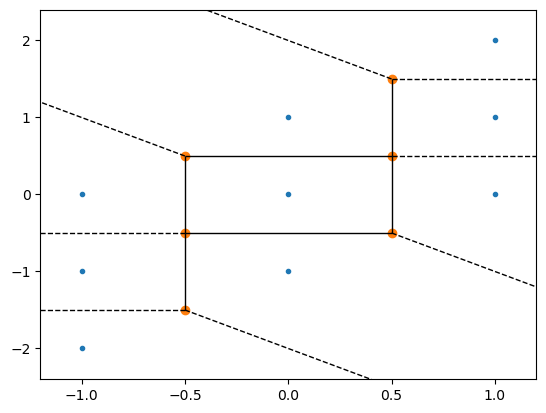

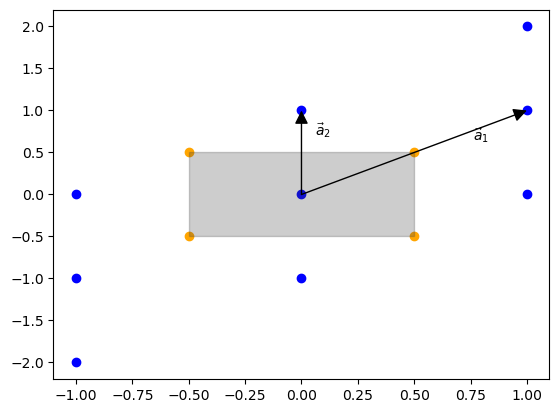

In [12]:
sphere_point = lambda rad: np.array([np.cos(rad), np.sin(rad)])

square_lattice = Lattice([1, 0], [0, 1])
tilted_lattice = Lattice([1, 1], [0, 1])
honeycomb_lattice = Lattice(sphere_point(0), sphere_point(np.pi * 2/3))

def get_elementary_cell(lattice: Lattice):
    points = []
    for n1 in range(-1, 2):
        for n2 in range(-1, 2):
            p = lattice.get_point(n1, n2)
            p_len = np.linalg.norm(p)
            # if (p_len <= lattice.vec_lengths).any():
            points.append(p)
    return points

def get_n_points_around_center(n)

points = get_elementary_cell(tilted_lattice)
vor = Voronoi(points)

print(vor)
fig = voronoi_plot_2d(vor)

def get_orthogonal_2D(vec):
    return np.array((vec[1], -vec[0]))
def plot_voronoi(lattice, v: Voronoi, subplot_kw={}):
    fig, ax = plt.subplots(**subplot_kw) 
    lattice_points = v.points
    lattice_vec_norm = np.sqrt(np.sum(lattice.vec_lengths**2))
    print(lattice_vec_norm, np.linalg.norm(v.vertices, axis=1))
    cell_vertices = v.vertices[np.linalg.norm(v.vertices, axis=1) <= 0.5 * lattice_vec_norm]
    
    x, y = zip(*lattice_points)
    ax.scatter(x, y, color="blue")
    x, y = zip(*cell_vertices)
    arrowprops = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8", color="black", shrinkA=0,shrinkB=0)
    for i, vec in enumerate(lattice.vecs):
        ax.annotate(f"", xy=lattice.vecs[i], xytext=lattice.center, arrowprops=arrowprops)
        # add name of vector at a perpendicular offset starting at half length
        ax.annotate(r"$\vec{a}_"+f"{i+1}$", xy=0.7*lattice.vecs[i], xytext=0.7*lattice.vecs[i] + 0.06*get_orthogonal_2D(lattice.vecs[i]))
        
    ax.scatter(x, y, color="orange")
    ax.fill(x, y, color="#4444")
    return fig
    

plot_voronoi(tilted_lattice, vor)

plt.show()